In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rc('font', family='NanumGothic')
plt.rcParams["axes.unicode_minus"] = False

In [2]:
fp ="./03.카드 승인매출정보_sample/201807_승인매출정보_sample100.csv" 
train_df = pd.read_csv(fp)

In [3]:
train_df.head(2)

,기준년월,발급회원번호,최종이용일자_기본,최종이용일자_신판,최종이용일자_CA,최종이용일자_카드론,최종이용일자_체크,최종이용일자_일시불,최종이용일자_할부,이용건수_신용_B0M,...,승인거절건수_한도초과_B0M,승인거절건수_BL_B0M,승인거절건수_입력오류_B0M,승인거절건수_기타_B0M,승인거절건수_R3M,승인거절건수_한도초과_R3M,승인거절건수_BL_R3M,승인거절건수_입력오류_R3M,승인거절건수_기타_R3M,이용금액대
0,201807,SYN_0,20180719,20180713,20180719,10101,20180203,20180709,20180713,11,...,0,0,0,0,3,3,0,0,0,01.100만원+
1,201807,SYN_1,20180719,20180719,20170728,20170327,10101,20180719,20171231,13,...,0,0,0,0,3,3,0,0,0,03.30만원+


In [4]:
dfs = []
for month in range(7, 13):
    yyyymm = f"2018{month:02d}"
    fp = f"./03.카드 승인매출정보_sample/{yyyymm}_승인매출정보_sample100.csv"
    df = pd.read_csv(fp)
    dfs.append(df)

train_df = pd.concat(dfs, ignore_index=True)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Columns: 431 entries, 기준년월 to Unnamed: 0
dtypes: float64(4), int64(409), object(18)
memory usage: 2.0+ MB


In [6]:
train_df.describe()

,기준년월,최종이용일자_기본,최종이용일자_신판,최종이용일자_CA,최종이용일자_카드론,최종이용일자_체크,최종이용일자_일시불,최종이용일자_할부,이용건수_신용_B0M,이용건수_신판_B0M,...,승인거절건수_한도초과_B0M,승인거절건수_BL_B0M,승인거절건수_입력오류_B0M,승인거절건수_기타_B0M,승인거절건수_R3M,승인거절건수_한도초과_R3M,승인거절건수_BL_R3M,승인거절건수_입력오류_R3M,승인거절건수_기타_R3M,Unnamed: 0
count,600.00000,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,600.000000,600.000000,...,600.0,600.0,600.0,600.0,600.000000,600.000000,600.000000,600.0,600.000000,500.000000
mean,201809.50000,1.977532e+07,1.977521e+07,6.860084e+06,3.638791e+06,8.070253e+06,1.977497e+07,1.432190e+07,11.210000,11.150000,...,0.0,0.0,0.0,0.0,0.095000,0.065000,0.013333,0.0,0.016667,49.500000
std,1.70925,2.825964e+06,2.825949e+06,9.551785e+06,7.751447e+06,9.879875e+06,2.825914e+06,9.154329e+06,17.401454,17.344419,...,0.0,0.0,0.0,0.0,0.522587,0.437142,0.230747,0.0,0.181964,28.894979
min,201807.00000,1.010100e+04,1.010100e+04,1.010100e+04,1.010100e+04,1.010100e+04,1.010100e+04,1.010100e+04,-3.000000,-3.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,201808.00000,2.018060e+07,2.018053e+07,1.010100e+04,1.010100e+04,1.010100e+04,2.018052e+07,1.010100e+04,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,24.750000
50%,201809.50000,2.018083e+07,2.018083e+07,1.010100e+04,1.010100e+04,1.010100e+04,2.018082e+07,2.016032e+07,5.000000,5.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,49.500000
75%,201811.00000,2.018103e+07,2.018103e+07,2.014011e+07,1.010100e+04,2.015021e+07,2.018102e+07,2.018022e+07,16.000000,16.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,74.250000
max,201812.00000,2.018123e+07,2.018123e+07,2.018122e+07,2.018062e+07,2.018123e+07,2.018123e+07,2.018123e+07,80.000000,78.000000,...,0.0,0.0,0.0,0.0,4.000000,3.000000,4.000000,0.0,2.000000,99.000000


In [7]:
train_df["이용건수_신용_R6M"]

0      77
1      81
2      17
3      27
4      -2
       ..
595    -3
596     6
597     1
598    72
599    49
Name: 이용건수_신용_R6M, Length: 600, dtype: int64

In [8]:
train_df["소비증감률_3M"] = (train_df["이용금액_신용_B0M"] - train_df["이용금액_신용_R3M"] / 3) / (train_df["이용금액_신용_R3M"] / 3 + 1e-6)
train_df["소비대비상환비율"] = (train_df["정상입금원금_B0M"] + train_df["연체입금원금_B0M"]) / (train_df["이용금액_신용_B0M"] + 1e-6)

In [9]:
train_df.columns = train_df.columns.str.strip()
cols = ["기준년월", "발급회원번호", "이용건수_신용_B0M", "이용금액_신용_B0M", 
        "이용건수_신용_R3M", "이용금액_신용_R3M",
        "이용건수_신용_R12M", "이용금액_신용_R12M","정상입금원금_B0M","연체입금원금_B0M","소비증감률_3M","소비대비상환비율"]

selected_df = train_df[cols]

In [10]:
selected_df

,기준년월,발급회원번호,이용건수_신용_B0M,이용금액_신용_B0M,이용건수_신용_R3M,이용금액_신용_R3M,이용건수_신용_R12M,이용금액_신용_R12M,정상입금원금_B0M,연체입금원금_B0M,소비증감률_3M,소비대비상환비율
0,201807,SYN_0,11,1420432,27,4224466,165,13391066,633586,810458,0.008718,1.016623e+00
1,201807,SYN_1,13,286211,43,1429080,204,6477338,519859,82612,-0.399171,2.104989e+00
2,201807,SYN_2,-3,0,3,243201,-1,904198,67117,32378,-1.000000,9.949500e+10
3,201807,SYN_3,5,28771,14,39116,44,257478,17582,0,1.206591,6.111015e-01
4,201807,SYN_4,-1,0,0,-128680,4,664057,0,0,-1.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
595,201812,SYN_95,-1,-21860,-3,-61822,-1,-62762,0,0,0.060787,-0.000000e+00
596,201812,SYN_96,1,132055,5,382923,24,2123175,75717,0,0.034581,5.733747e-01
597,201812,SYN_97,-1,0,-2,0,15,459917,0,0,0.000000,0.000000e+00
598,201812,SYN_98,12,140707,32,414491,186,3335847,104806,0,0.018408,7.448528e-01


In [11]:
dfs = []
for month in range(7, 13):
    yyyymm = f"2018{month:02d}"
    fp = f"./04.카드 청구정보_sample/{yyyymm}_청구정보_sample100.csv"
    df = pd.read_csv(fp)
    dfs.append(df)

train_df = pd.concat(dfs, ignore_index=True)

In [12]:
train_df

,기준년월,발급회원번호,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,...,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액,Unnamed: 0
0,201807,SYN_0,27,2,_,S,03.LMS,1,1,1,...,5,3,0,0,1,0,328,0,0,NaN
1,201807,SYN_1,13,2,002,1,01.우편,1,1,1,...,6,3,0,0,0,0,0,0,0,NaN
2,201807,SYN_2,25,2,002,1,01.우편,1,1,1,...,4,3,0,0,0,0,1975,0,0,NaN
3,201807,SYN_3,5,2,_,2,02.이메일,1,1,1,...,6,3,0,0,0,0,0,0,0,NaN
4,201807,SYN_4,23,2,_,2,02.이메일,0,0,0,...,1,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,201812,SYN_95,13,2,_,2,02.이메일,0,0,0,...,0,0,0,0,0,0,2694,0,898,95.0
596,201812,SYN_96,5,2,002,1,01.우편,1,1,1,...,6,3,0,0,0,0,0,0,0,96.0
597,201812,SYN_97,23,2,_,2,02.이메일,0,0,0,...,1,0,0,0,0,0,0,0,0,97.0
598,201812,SYN_98,12,2,002,1,01.우편,1,1,1,...,4,2,0,0,2,2,14052,0,4711,98.0


In [13]:
train_df.columns = train_df.columns.str.strip()
cols = ["기준년월", "발급회원번호","대표결제일", "청구금액_B0","청구금액_R3M","청구금액_R6M"]
selected2_df = train_df[cols]

In [14]:
trans_history = pd.merge(selected_df, selected2_df, on=["기준년월", "발급회원번호"], how="left")

In [15]:
trans_history

,기준년월,발급회원번호,이용건수_신용_B0M,이용금액_신용_B0M,이용건수_신용_R3M,이용금액_신용_R3M,이용건수_신용_R12M,이용금액_신용_R12M,정상입금원금_B0M,연체입금원금_B0M,소비증감률_3M,소비대비상환비율,대표결제일,청구금액_B0,청구금액_R3M,청구금액_R6M
0,201807,SYN_0,11,1420432,27,4224466,165,13391066,633586,810458,0.008718,1.016623e+00,27,1222688,4658805,8869367
1,201807,SYN_1,13,286211,43,1429080,204,6477338,519859,82612,-0.399171,2.104989e+00,13,583483,1053031,1686162
2,201807,SYN_2,-3,0,3,243201,-1,904198,67117,32378,-1.000000,9.949500e+10,25,67452,483423,701182
3,201807,SYN_3,5,28771,14,39116,44,257478,17582,0,1.206591,6.111015e-01,5,17501,51507,93318
4,201807,SYN_4,-1,0,0,-128680,4,664057,0,0,-1.000000,0.000000e+00,23,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,201812,SYN_95,-1,-21860,-3,-61822,-1,-62762,0,0,0.060787,-0.000000e+00,13,0,0,0
596,201812,SYN_96,1,132055,5,382923,24,2123175,75717,0,0.034581,5.733747e-01,5,83910,228712,394712
597,201812,SYN_97,-1,0,-2,0,15,459917,0,0,0.000000,0.000000e+00,23,0,0,0
598,201812,SYN_98,12,140707,32,414491,186,3335847,104806,0,0.018408,7.448528e-01,12,162084,456434,1399044


In [16]:
trans_history["상환율"] = trans_history["정상입금원금_B0M"] / trans_history["청구금액_B0"].clip(lower=1)

In [17]:
trans_history["연체후_상환율"] = trans_history["연체입금원금_B0M"] / trans_history["청구금액_B0"].clip(lower=1)

In [18]:
trans_history["소비대비청구비율"] = trans_history["청구금액_B0"] / (trans_history["이용금액_신용_B0M"] + 1e-6)

In [19]:
trans_history["상환율_변동계수"] = trans_history[["상환율", "연체후_상환율"]].std(axis=1) / (trans_history[["상환율", "연체후_상환율"]].mean(axis=1) + 1e-6)

In [20]:
trans_history["과소비_잠재지수"] = trans_history["소비증감률_3M"] * (1 - trans_history["상환율"])
trans_history["상환안정성_지수"] = 1 - trans_history["상환율_변동계수"]
trans_history["소비대비납부차이"] = trans_history["소비대비청구비율"] - trans_history["소비대비상환비율"]

trans_history.replace([np.inf, -np.inf], np.nan, inplace=True)
trans_history.fillna(0, inplace=True)

In [21]:
trans_history

,기준년월,발급회원번호,이용건수_신용_B0M,이용금액_신용_B0M,이용건수_신용_R3M,이용금액_신용_R3M,이용건수_신용_R12M,이용금액_신용_R12M,정상입금원금_B0M,연체입금원금_B0M,...,청구금액_B0,청구금액_R3M,청구금액_R6M,상환율,연체후_상환율,소비대비청구비율,상환율_변동계수,과소비_잠재지수,상환안정성_지수,소비대비납부차이
0,201807,SYN_0,11,1420432,27,4224466,165,13391066,633586,810458,...,1222688,4658805,8869367,0.518191,0.662849,8.607860e-01,0.173218,0.004201,0.826782,-1.558371e-01
1,201807,SYN_1,13,286211,43,1429080,204,6477338,519859,82612,...,583483,1053031,1686162,0.890958,0.141584,2.038646e+00,1.026372,-0.043526,-0.026372,-6.634266e-02
2,201807,SYN_2,-3,0,3,243201,-1,904198,67117,32378,...,67452,483423,701182,0.995034,0.480015,6.745200e+10,0.493777,-0.004966,0.506223,-3.204300e+10
3,201807,SYN_3,5,28771,14,39116,44,257478,17582,0,...,17501,51507,93318,1.004628,0.000000,6.082861e-01,1.414211,-0.005584,-0.414211,-2.815335e-03
4,201807,SYN_4,-1,0,0,-128680,4,664057,0,0,...,0,0,0,0.000000,0.000000,0.000000e+00,0.000000,-1.000000,1.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,201812,SYN_95,-1,-21860,-3,-61822,-1,-62762,0,0,...,0,0,0,0.000000,0.000000,-0.000000e+00,0.000000,0.060787,1.000000,0.000000e+00
596,201812,SYN_96,1,132055,5,382923,24,2123175,75717,0,...,83910,228712,394712,0.902360,0.000000,6.354171e-01,1.414210,0.003377,-0.414210,6.204233e-02
597,201812,SYN_97,-1,0,-2,0,15,459917,0,0,...,0,0,0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00
598,201812,SYN_98,12,140707,32,414491,186,3335847,104806,0,...,162084,456434,1399044,0.646615,0.000000,1.151926e+00,1.414209,0.006505,-0.414209,4.070729e-01


In [22]:
trans_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   기준년월          600 non-null    int64  
 1   발급회원번호        600 non-null    object 
 2   이용건수_신용_B0M   600 non-null    int64  
 3   이용금액_신용_B0M   600 non-null    int64  
 4   이용건수_신용_R3M   600 non-null    int64  
 5   이용금액_신용_R3M   600 non-null    int64  
 6   이용건수_신용_R12M  600 non-null    int64  
 7   이용금액_신용_R12M  600 non-null    int64  
 8   정상입금원금_B0M    600 non-null    int64  
 9   연체입금원금_B0M    600 non-null    int64  
 10  소비증감률_3M      600 non-null    float64
 11  소비대비상환비율      600 non-null    float64
 12  대표결제일         600 non-null    int64  
 13  청구금액_B0       600 non-null    int64  
 14  청구금액_R3M      600 non-null    int64  
 15  청구금액_R6M      600 non-null    int64  
 16  상환율           600 non-null    float64
 17  연체후_상환율       600 non-null    float64
 18  소비대비청구비율      600 non-null    

In [23]:
trans_history.describe()

,기준년월,이용건수_신용_B0M,이용금액_신용_B0M,이용건수_신용_R3M,이용금액_신용_R3M,이용건수_신용_R12M,이용금액_신용_R12M,정상입금원금_B0M,연체입금원금_B0M,소비증감률_3M,...,청구금액_B0,청구금액_R3M,청구금액_R6M,상환율,연체후_상환율,소비대비청구비율,상환율_변동계수,과소비_잠재지수,상환안정성_지수,소비대비납부차이
count,600.00000,600.000000,6.000000e+02,600.000000,6.000000e+02,600.000000,6.000000e+02,6.000000e+02,6.000000e+02,600.000000,...,6.000000e+02,6.000000e+02,6.000000e+02,600.000000,600.000000,6.000000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,201809.50000,11.210000,3.472864e+05,34.420000,1.033891e+06,131.643333,4.210956e+06,2.479732e+05,1.201380e+05,0.119604,...,3.513935e+05,1.094663e+06,2.286779e+06,0.586774,1901.977791,1.648673e+09,0.821015,-0.121776,0.178985,-4.082750e+08
std,1.70925,17.401454,4.602641e+05,53.176811,1.414110e+06,192.064227,5.888555e+06,3.296244e+05,2.790063e+05,2.811892,...,5.085868e+05,1.591023e+06,3.257085e+06,0.442923,11211.668261,1.285911e+10,0.609173,0.821175,0.609173,1.379798e+10
min,201807.00000,-3.000000,-6.795300e+04,-9.000000,-2.693560e+05,-1.000000,-3.256560e+05,0.000000e+00,0.000000e+00,-10.064090,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-2.574692e+00,0.000000,-13.919191,-0.414214,-8.771400e+10
25%,201808.00000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,4.589518e+05,0.000000e+00,0.000000e+00,-0.063511,...,0.000000e+00,0.000000e+00,5.462125e+04,0.000000,0.000000,0.000000e+00,0.000000,-0.010099,-0.414211,-8.650467e-02
50%,201809.50000,5.000000,1.609190e+05,15.000000,4.404955e+05,53.000000,2.214187e+06,1.213445e+05,0.000000e+00,0.000000,...,1.509280e+05,4.604325e+05,9.367940e+05,0.743214,0.000000,6.705435e-01,0.987977,0.000000,0.012023,0.000000e+00
75%,201811.00000,16.000000,5.264238e+05,48.250000,1.565872e+06,177.000000,5.836459e+06,4.012112e+05,5.856075e+04,0.013558,...,4.882130e+05,1.500139e+06,3.414607e+06,0.963393,0.278679,1.042026e+00,1.414211,0.001191,1.000000,5.065760e-02
max,201812.00000,80.000000,2.052085e+06,258.000000,6.489107e+06,896.000000,4.034574e+07,2.775931e+06,1.711481e+06,55.078359,...,4.278202e+06,1.204475e+07,2.215824e+07,1.406121,159455.000000,1.430380e+11,1.414214,4.362819,1.000000,1.301590e+11


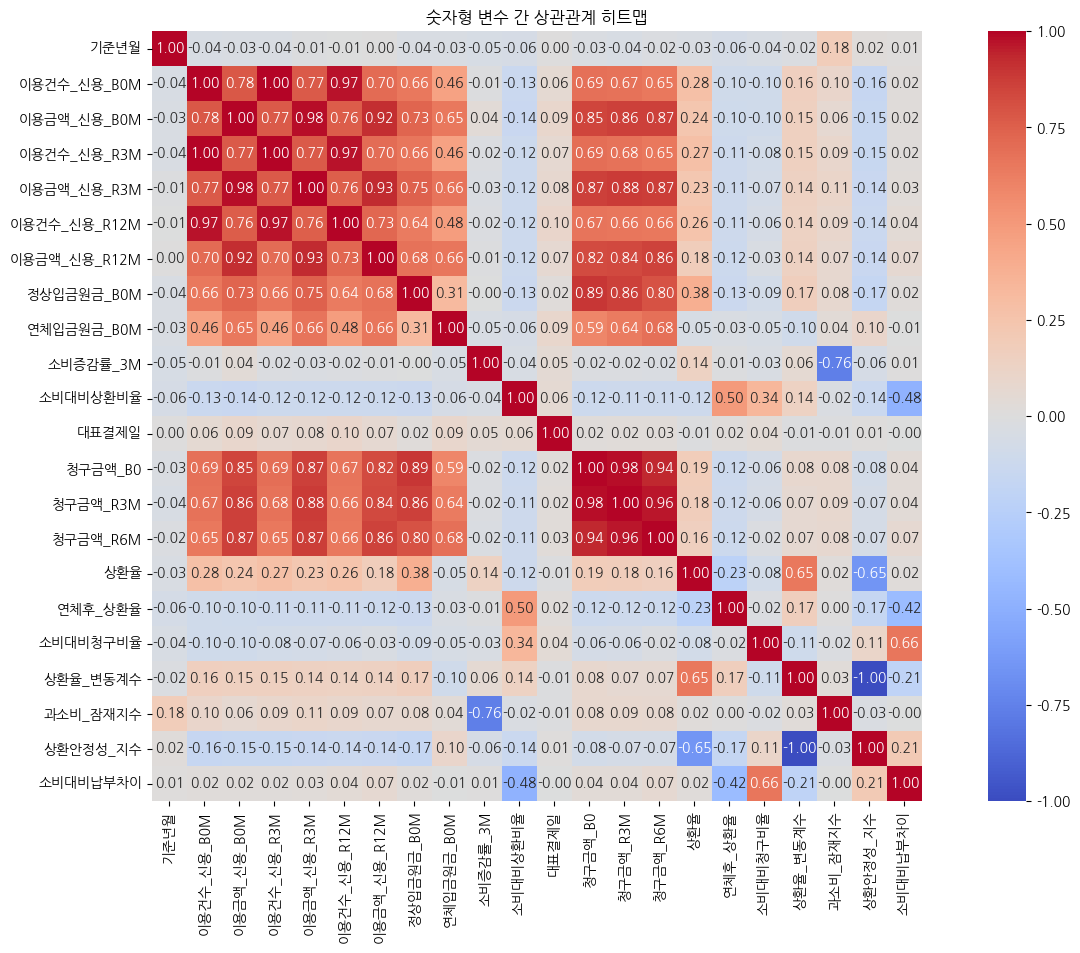

In [24]:
numeric_df = trans_history.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

plt.figure(figsize=(17, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('숫자형 변수 간 상관관계 히트맵')
plt.show()